## Online News Popularity

### 1 - Análisis exploratorio de los datos



Leamos los datos del drive:

In [1]:
# Para acceder a nuestros ficheros de Google Drive
from google.colab import drive
drive.mount('/content/drive')

# La carpeta 'clasificacion' (que contiene optdigits.tes, optdigits.tra, optdigits.names)
# debe estar en vuestro Drive, dentro de la carpeta 'Colab Notebooks'
dataFolder = 'drive/MyDrive/Colab Notebooks/datos/'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(dataFolder + "/OnlineNewsPopularity.csv")
df

Mounted at /content/drive


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


Veamos qué atributos tenemos:

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

Tal y como se muestra en el paper original, los atributos podemos clasificarlos en varios tipos:



![tabla atributos](https://drive.google.com/uc?export=view&id=1DriKiOd6_Js8j0nUKF21pI6qkd7opxVz)


Procedemos a aclarar algunos atributos para facilitar su comprensión:


1.   Non-stop words: son las palabras que tienen significado, es decir no son preposiciones, conjunciones, etc.
2.   Natural Language Processing: son atributos de procesado de lenguaje natural, como LDA (Latent Dirichlet Allocation), que identifica los 5 temas más importantes de la web.



Se nos da también la siguiente información de los datos:
*   No hay valores perdidos
*   Existen dos atributos (url y timedelta) no predictivos.



Eliminaremos dichos atributos, ya que no servirán para la predicción:

In [3]:
# Here we drop the two non-preditive (url and timedelta) attributes. They won't contribute anything
df.drop(labels=['url', ' timedelta'], axis = 1, inplace=True)
df.head(n=4)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.0,0.0000,0.5,0.0000,1200


Existen algunos espacios en los nombres de las características, que eliminaremos para que sea más sencillo trabajar con los atributos:

In [4]:
df.columns = df.columns.str.strip()

Veamos algunos parámetros estadísticos de los datos:

In [5]:
df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


Parece que cada característica toma valores en dominios muy distintos.

Confirmémoslo utilizando un diagrama de cajas:

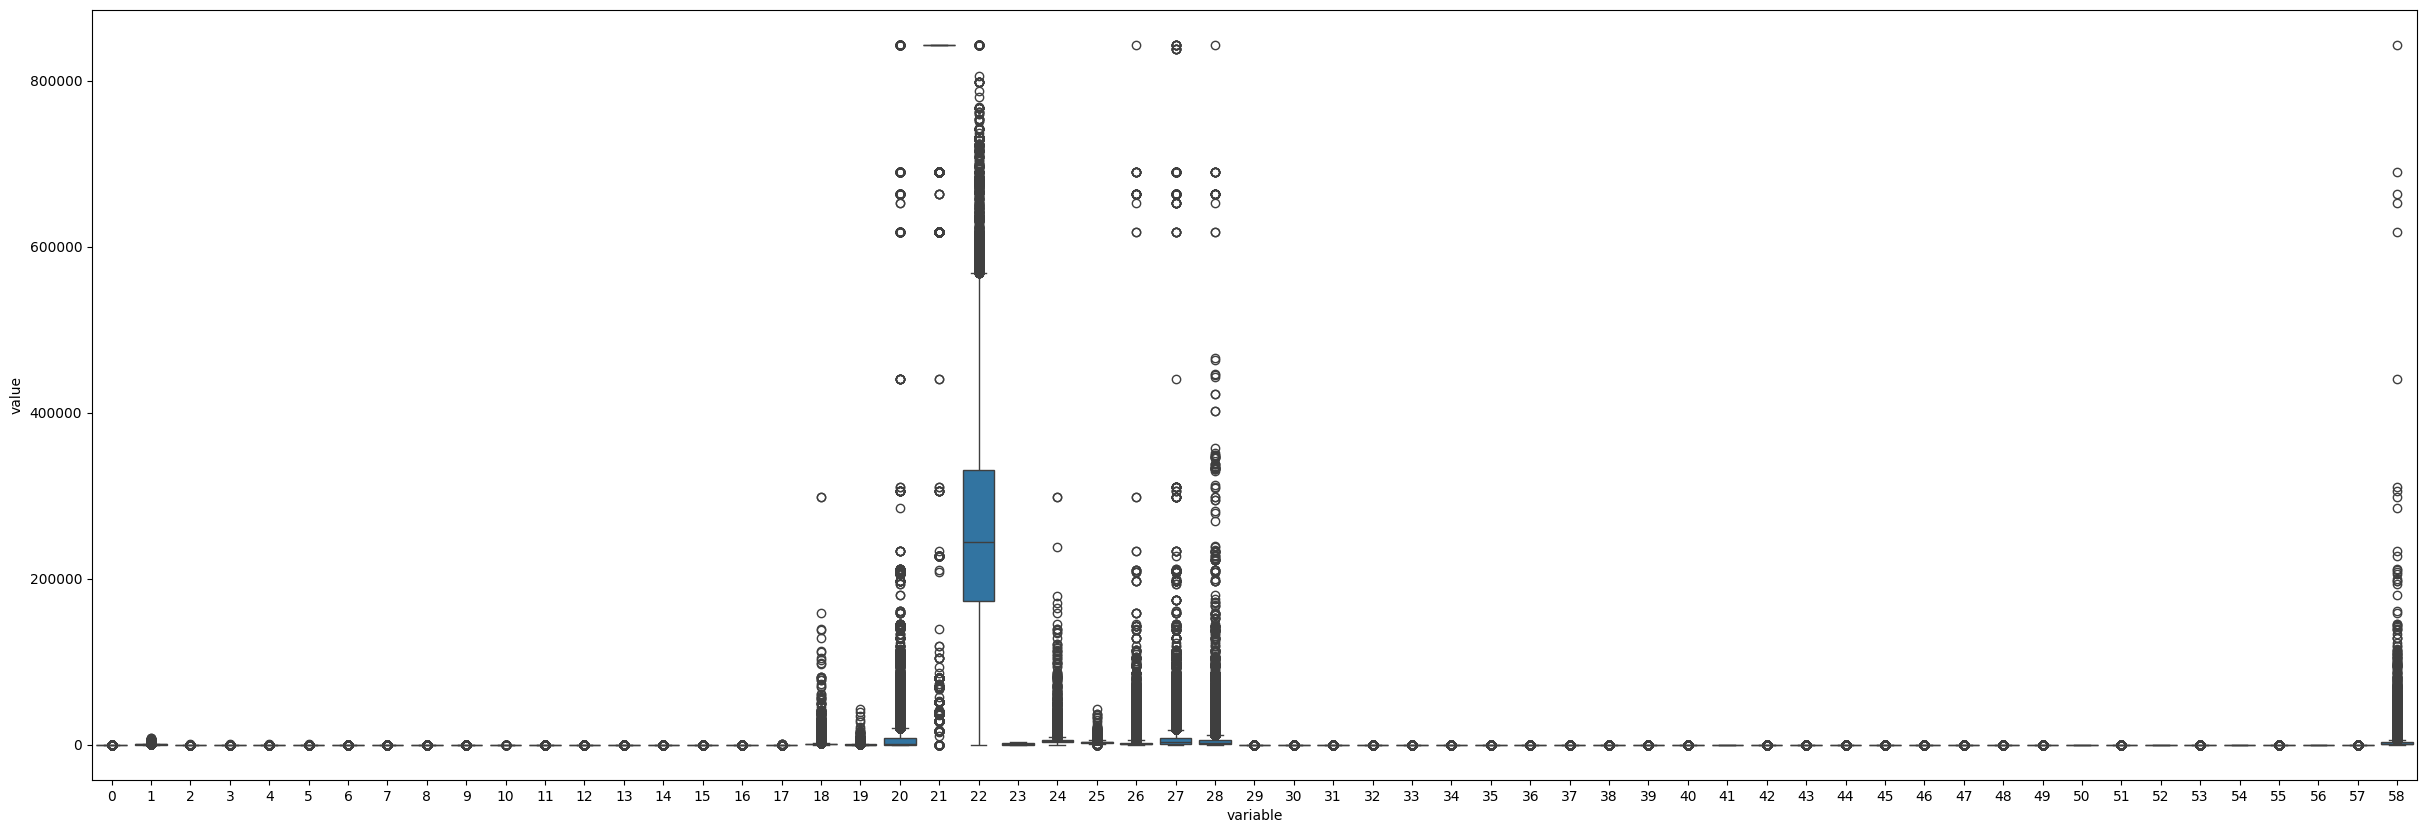

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# display boxlots
data = pd.DataFrame(data=df)
data.columns = range(0,len(df.columns))
data

plt.figure(figsize=(30,10))
sns.boxplot(x="variable", y="value", data=pd.melt(data))
plt.show()

In [7]:
df.columns[22], df.columns[58]

('kw_avg_max', 'shares')

Concluimos que tanto el atributo 22, como el 58 (objetivo), tienen valores muy distintos al resto, que en su mayoría, se concentran entre 0 y 1.

Por tanto, un escalado será muy necesario.

Veamos ahora si, tal y como se nos advertía, la distribución de los *shares* es tan desbalanceada:

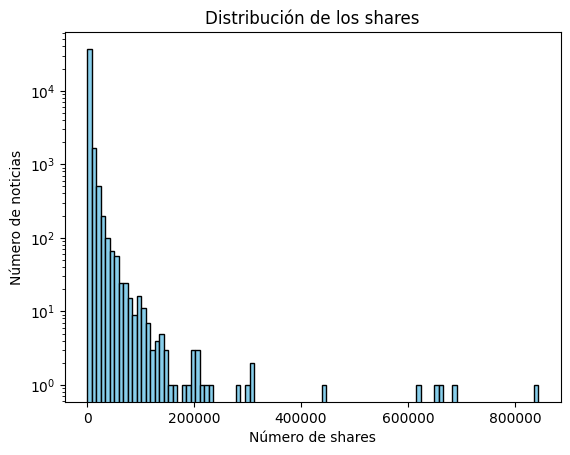

In [8]:
plt.hist(df['shares'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribución de los shares')
plt.xlabel('Número de shares')
plt.ylabel('Número de noticias')
plt.yscale('log')
plt.show()

Tal y como se nos advertía, tenemos una distribución *power law*, con una cola larga a la derecha. Incluso utilizando escala logarítmica en el anterior diagrama, sigue apreciándose el desbalanceo.

Prácticamente, todos los artículos se encuentran entre los 1000 y 3000 shares. Sin embargo, llega a haber artículos de más de 800 mil shares.

MATRIZ CORRELACION

#### 1.1 - División en entrenamiento y test

Para el problema de regresión no hay funciones implementadas que separan estratificadamente el dataset en test y entrenamiento de forma directa. Por eso hay que hacerlo manualmente, agrupando los datos en "buckets" de tamaño arbitrario. El tamaño se ha elegido para que se agrupen ejemplos con shares similares, para que al separar se mantenga la distribución del dataset tanto en el conjunto de test como de entrenamiento.

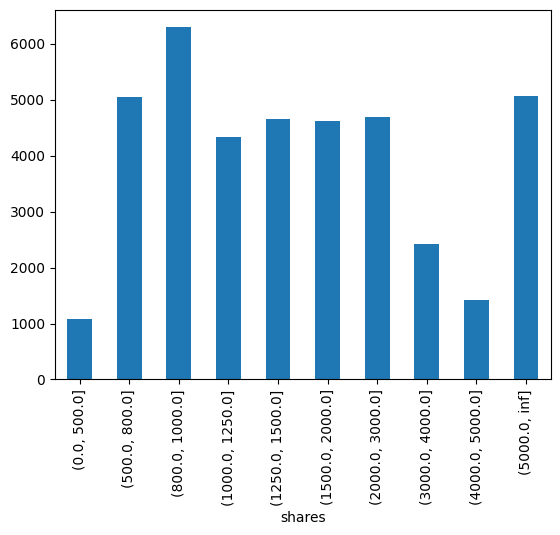

In [9]:
bins = [0., 500, 800, 1000, 1250, 1500, 2000, 3000, 4000, 5000, np.inf]
label = range(0,len(bins)-1)

df["popularity"] = pd.cut(df["shares"], bins=bins, labels=label)
r = df.groupby(pd.cut(df['shares'], bins=bins)).count()['popularity']
r.plot(kind='bar')
plt.show()

In [10]:
df["popularity"]

0        1
1        1
2        4
3        3
4        1
        ..
39639    5
39640    5
39641    5
39642    3
39643    4
Name: popularity, Length: 39644, dtype: category
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]

Ahora dividimos el dataset usando `StratifiedShuffleSplit`.

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=42)
for train_index, test_index in split.split(df, df["popularity"]):
    train_set = df.iloc[train_index]
    test_set = df.iloc[test_index]

Comprobamos si la distribución del conjunto de entrenamiento y de test es similar.

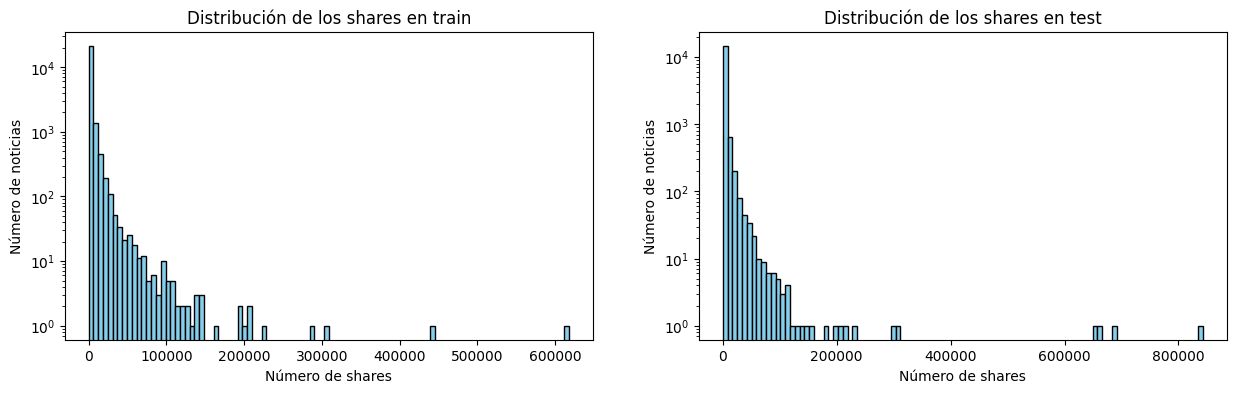

In [12]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
plt.hist(train_set['shares'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribución de los shares en train')
plt.yscale('log')
plt.xlabel('Número de shares')
plt.ylabel('Número de noticias')

plt.subplot(1,2,2)
plt.hist(test_set['shares'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribución de los shares en test')
plt.yscale('log')
plt.xlabel('Número de shares')
plt.ylabel('Número de noticias')

plt.show()

Efectivamente, se mantiene similar. Ahora eliminamos los shares y la popularity para hacer el escalado.

In [13]:
x_train = train_set.drop(columns=["shares", "popularity"])
x_train

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
35580,9.0,115.0,0.767857,1.0,0.897059,5.0,5.0,0.0,2.0,4.460870,...,0.416667,0.333333,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000
7239,9.0,1521.0,0.411804,1.0,0.591160,19.0,4.0,10.0,0.0,4.803419,...,0.362493,0.100000,1.0,-0.177076,-0.500000,-0.050000,0.000000,0.000000,0.500000,0.000000
22665,9.0,193.0,0.594286,1.0,0.603306,17.0,2.0,0.0,16.0,4.409326,...,0.464286,0.100000,1.0,-0.585185,-1.000000,-0.155556,0.594444,0.122222,0.094444,0.122222
5625,9.0,265.0,0.634981,1.0,0.737143,8.0,0.0,1.0,0.0,4.969811,...,0.359744,0.100000,0.8,-0.243229,-0.800000,-0.083333,0.684848,0.478788,0.184848,0.478788
4823,8.0,256.0,0.625000,1.0,0.810219,3.0,0.0,1.0,0.0,4.589844,...,0.346475,0.100000,0.7,-0.116111,-0.155556,-0.050000,0.000000,0.000000,0.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18506,9.0,120.0,0.710280,1.0,0.819444,4.0,3.0,1.0,0.0,4.475000,...,0.550000,0.500000,0.6,-0.500000,-0.500000,-0.500000,0.000000,0.000000,0.500000,0.000000
30367,13.0,1281.0,0.358833,1.0,0.504054,7.0,5.0,15.0,0.0,4.422326,...,0.332671,0.033333,1.0,-0.352654,-1.000000,-0.071429,0.033333,0.016667,0.466667,0.016667
21781,8.0,1166.0,0.493274,1.0,0.709726,39.0,2.0,16.0,1.0,4.767581,...,0.365726,0.100000,1.0,-0.311157,-1.000000,-0.050000,0.700000,-0.400000,0.200000,0.400000
6042,12.0,192.0,0.692708,1.0,0.864000,2.0,2.0,0.0,1.0,4.489583,...,0.247273,0.100000,0.5,-0.168333,-0.300000,-0.050000,0.400000,0.133333,0.100000,0.133333


### 2 - Preprocesado de los datos

Hemos considerado usar PCA, pero para mantener explicabilidad de la importancia de los atributos al obtener los resultados no lo hemos hecho.

A pesar de eso hemos intentado aplicar PCA y los resultados han sido peores que sin ella.

Hemos tratado de unificar los atributos relacionados con los días de la semana y los temas usando `LabelEncoder`.

Sin embargo, esto nos hace perder la información de que el lunes sigue al domingo, y esto no nos interesa (y en los temas no existe orden). Tampoco podemos usar el `OneHotEncoder`porque no cambiaría nada.

Hemos aplicado `StandardScaler` porque los atributos estaban en rangos distintos.

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

### 3 - De regresión a clasificación

Como el dataset es muy desbalanceado, aplicar regresión directamente no obtendría resultados buenos. Por eso hemos transformado el problema en uno de clasificación.

Hemos probado con más de dos clases y los resultados que se han obtenido son bastante deficientes. Por eso, hemos optado por hacer una clasificación binaria (Popular/No Popular).

#### 3.1 - Determinación del umbral

Para determinar el umbral de separación de las clases, hemos entrenado un modelo separando las datos en clases con distintos umbrales (en concreto, un `RandomForest`con la métrica de `f1_macro`), y nos hemos quedado con el umbral que daba mejores resultados.

Hemos usado `RandomForest` porque es el modelo que en general proporciona mejores resultados para datos tabulares. Utilizamos `f1_macro` porque es una métrica que aglutina dos de las principales métricas que se usan en problemas de clasificación (precision y recall).

Se usa la versión de `f1` `_macro` porque va mejor con clases desbalanceadas.



Para guiarnos en la elección del umbral, tomamos valores cercanos de la mediana ($1400$) para que las clases estén balanceadas.

In [15]:
train_set['shares'].describe()

count     23786.000000
mean       3326.408265
std        9546.192485
min          22.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      617900.000000
Name: shares, dtype: float64

Procedemos a entrenar el `RandomForest` con distintos umbrales en torno a la mediana y nos quedamos con el que tiene mejor `f1_macro`.

In [16]:
umbral = [1100, 1200, 1300, 1400, 1500]

from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)

for i in umbral:
  bins = [0, i, np.inf]
  print(bins)
  y = pd.cut(train_set["shares"], bins=[0,i,np.inf], labels=['NonPopular', 'Popular']).to_numpy()

  print(cross_validate(rfc, x_train_scaled, y, cv = 3, return_train_score=True, scoring = {
      'f1': 'f1_macro'
  }))



[0, 1100, inf]
{'fit_time': array([8.73430848, 9.04716921, 7.55481768]), 'score_time': array([0.25547075, 0.33722091, 0.26661205]), 'test_f1': array([0.64608716, 0.64057449, 0.64551147]), 'train_f1': array([1.        , 0.99993247, 1.        ])}
[0, 1200, inf]
{'fit_time': array([9.00464511, 8.07138348, 8.25557518]), 'score_time': array([0.25519109, 0.34676838, 0.24843836]), 'test_f1': array([0.65440089, 0.65975922, 0.65564075]), 'train_f1': array([1., 1., 1.])}
[0, 1300, inf]
{'fit_time': array([8.94445419, 7.57875562, 9.11009622]), 'score_time': array([0.28638864, 0.25549722, 0.25898576]), 'test_f1': array([0.65495853, 0.6649512 , 0.66210017]), 'train_f1': array([1., 1., 1.])}
[0, 1400, inf]
{'fit_time': array([8.41707397, 7.71868229, 9.21525931]), 'score_time': array([0.34672189, 0.25801682, 0.26270628]), 'test_f1': array([0.65484393, 0.66326054, 0.65244437]), 'train_f1': array([1., 1., 1.])}
[0, 1500, inf]
{'fit_time': array([9.80929732, 8.10979176, 9.13687015]), 'score_time': array

Como vemos hay mucho overfitting, por eso vamos a regularizar el modelo. Limitamos el número de ejemplos en las hojas y la profundidad máxima.

In [17]:
rfc = RandomForestClassifier(n_estimators = 200, max_depth= 12, min_samples_leaf=5, random_state=42)

umbral = [1100, 1200, 1300, 1400, 1500]

for i in umbral:
  bins = [0, i, np.inf]
  print(bins)
  y = pd.cut(train_set["shares"], bins=[0,i,np.inf], labels=['NonPopular', 'Popular']).to_numpy()

  print(cross_validate(rfc, x_train_scaled, y, cv = 3, return_train_score=True, scoring = {
      'f1': 'f1_macro'
  }))

[0, 1100, inf]
{'fit_time': array([12.66481018, 11.95005274, 11.3860333 ]), 'score_time': array([0.34288096, 0.43523622, 0.43668008]), 'test_f1': array([0.63461738, 0.63802433, 0.63404815]), 'train_f1': array([0.80687788, 0.80595729, 0.80612367])}
[0, 1200, inf]
{'fit_time': array([11.80406785, 12.30101943, 12.49816203]), 'score_time': array([0.33592439, 0.32667446, 0.33696437]), 'test_f1': array([0.65773723, 0.65336042, 0.65428387]), 'train_f1': array([0.83484393, 0.83132213, 0.83497644])}
[0, 1300, inf]
{'fit_time': array([12.58105326, 12.57083273, 12.54624367]), 'score_time': array([0.32904339, 0.34339118, 0.33685851]), 'test_f1': array([0.66400324, 0.66458178, 0.65368669]), 'train_f1': array([0.84511142, 0.84402254, 0.84690712])}
[0, 1400, inf]
{'fit_time': array([13.8303616 , 12.39037442, 11.82563186]), 'score_time': array([0.3349421 , 0.37750149, 0.44383788]), 'test_f1': array([0.65634233, 0.66514778, 0.65366012]), 'train_f1': array([0.8560327 , 0.85339075, 0.85125852])}
[0, 1500

Seguimos teniendo overfitting pero mucho menos.

Tanto $1300$ como $1400$ obtienen los mejores resultados, aunque son ligeramente mejores para $1300$. Por eso nos quedamos con $1300$.

In [18]:
umbral = 1300
bins = [0,umbral, np.inf]
y_train = pd.cut(train_set["shares"], bins=bins, labels=['NonPopular', 'Popular']).to_numpy()

Vamos a ver la distribución de las clases obtenida.

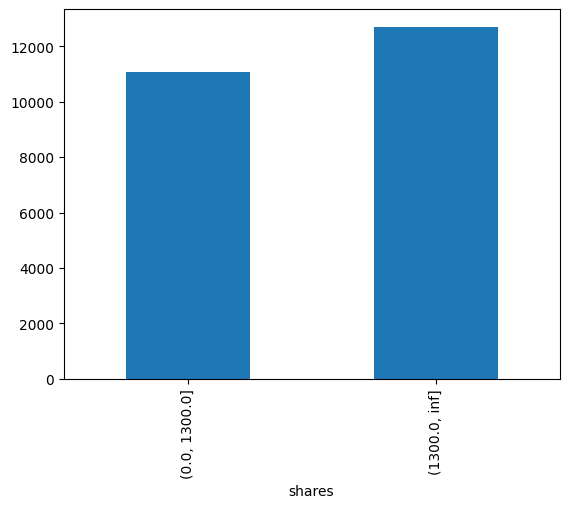

In [19]:
r = train_set.groupby(pd.cut(train_set['shares'], bins=bins)).count()['popularity']
r.plot(kind='bar')
plt.show()

Observamos que están más o menos balanceadas.

#### 3.2 - Selección de modelos

Para seleccionar los mejores modelos, entrenamos varios modelos con hiperparámetros por defecto y medimos y comparamos su rendimiento utilizando `cross-validation` y las métricas más importantes en clasificación: `accuracy`, `precision`, `recall` y `f1`.

Utilizaremos $3$-fold para agilizar el proceso.

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

print(cross_validate(knn, x_train_scaled, y_train, cv = 3, scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro' }
    ))


{'fit_time': array([0.02342153, 0.03686309, 0.04047894]), 'score_time': array([2.1765914 , 2.70092392, 2.65762615]), 'test_accuracy': array([0.60272418, 0.60915626, 0.60633199]), 'test_precision': array([0.60193533, 0.60789406, 0.60581745]), 'test_recall': array([0.60234406, 0.60819447, 0.60628382]), 'test_f1': array([0.60186189, 0.60794897, 0.60563623])}


In [21]:
from sklearn.svm import SVC
svm = SVC(random_state=42)

print(cross_validate(svm, x_train_scaled, y, cv = 3, scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}))

{'fit_time': array([22.79506254, 23.4067142 , 23.69692779]), 'score_time': array([13.07052517, 11.10831594, 16.20762539]), 'test_accuracy': array([0.6505234 , 0.65291966, 0.65123613]), 'test_precision': array([0.6490861 , 0.65097317, 0.65006972]), 'test_recall': array([0.64245521, 0.64587002, 0.64282915]), 'test_f1': array([0.64221888, 0.6459944 , 0.64247577])}


In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)

print(cross_validate(lr, x_train_scaled, y, cv = 3, scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}))

{'fit_time': array([0.59678245, 0.69822049, 0.57981944]), 'score_time': array([0.55662918, 0.47084665, 0.45403552]), 'test_accuracy': array([0.65291966, 0.65758608, 0.64442482]), 'test_precision': array([0.65113188, 0.65560103, 0.64213565]), 'test_recall': array([0.6455863 , 0.65100209, 0.63725315]), 'test_f1': array([0.64563285, 0.65128303, 0.63724969])}


In [23]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=42)

print(cross_validate(sgd, x_train_scaled, y, cv = 3, scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}))

{'fit_time': array([0.49188519, 0.47301984, 0.525846  ]), 'score_time': array([0.26225138, 0.25019598, 0.24412322]), 'test_accuracy': array([0.63412788, 0.61924581, 0.62386478]), 'test_precision': array([0.63282336, 0.6176177 , 0.62116653]), 'test_recall': array([0.6244143 , 0.60828158, 0.62085505]), 'test_f1': array([0.6230377 , 0.6056164 , 0.62097709])}


In [24]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state=42)

print(cross_validate(abc, x_train_scaled, y, cv = 3, scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}))

{'fit_time': array([4.64865208, 6.195678  , 4.60325718]), 'score_time': array([0.2858932 , 0.31941342, 0.31102538]), 'test_accuracy': array([0.65657712, 0.6597301 , 0.66019173]), 'test_precision': array([0.6541812 , 0.6572538 , 0.65787119]), 'test_recall': array([0.65097972, 0.65489264, 0.65465448]), 'test_f1': array([0.65138117, 0.65533872, 0.6550922 ])}


Seleccionamos el mejor modelo para ajustar sus hiperparámetros, que es el `RandomForest`.

#### 3.3 - Ajuste de hiperparámetros


Hacemos `GridSearchCV` para seleccionar los mejores hiperparámetros. Ajustaremos el número de estimadores, la profundidad máxima y el número mínimo de hojas (porque hemos visto que el modelo tiende a sobreajustar).

In [25]:
from sklearn.model_selection import GridSearchCV

nTrees = [200, 400]
max_depth= [12, 15]
min_samples_leaf=[10, 15]

# Ajustamos el valor del número de vecinos
param_grid = {'n_estimators': nTrees, 'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf}
grid = GridSearchCV (rfc, scoring = "f1_macro", param_grid = param_grid, cv = 3)
grid.fit (x_train_scaled, y)

grid.best_params_

{'max_depth': 15, 'min_samples_leaf': 10, 'n_estimators': 400}

Imprimimos los resultados:

In [26]:
for params, results in zip(grid.cv_results_['params'], grid.cv_results_['mean_test_score']):
  print(f'{params} , Score = {results}')

print()
print()
print(f'Mejor modelo = {grid.best_params_}')

{'max_depth': 12, 'min_samples_leaf': 10, 'n_estimators': 200} , Score = 0.6574054961631732
{'max_depth': 12, 'min_samples_leaf': 10, 'n_estimators': 400} , Score = 0.6556816478069105
{'max_depth': 12, 'min_samples_leaf': 15, 'n_estimators': 200} , Score = 0.6556385069251794
{'max_depth': 12, 'min_samples_leaf': 15, 'n_estimators': 400} , Score = 0.6544704895388987
{'max_depth': 15, 'min_samples_leaf': 10, 'n_estimators': 200} , Score = 0.6557212569267648
{'max_depth': 15, 'min_samples_leaf': 10, 'n_estimators': 400} , Score = 0.657477321826707
{'max_depth': 15, 'min_samples_leaf': 15, 'n_estimators': 200} , Score = 0.6545118483761182
{'max_depth': 15, 'min_samples_leaf': 15, 'n_estimators': 400} , Score = 0.6548815979673287


Mejor modelo = {'max_depth': 15, 'min_samples_leaf': 10, 'n_estimators': 400}


### 4 - De Clasificación a Regresión

El problema original era de regresión, pero debido al desbalanceo existente en el dataset, intentaremos resolver parcialmente el problema.

El objetivo será el siguiente:

1.   Primero usamos el clasificador y dividimos en Popular y No Popular.
2.   Descartamos los populares porque son muy desbalanceados y predecimos el número de shares de los No Populares.



#### 4.1 - Entrenamiento de modelos

Entrenaremos dos modelos de elección arbitraria (`RandomForest` y `GradientBoosting`), que suelen obtener buenos resultados en regresión. Los modelos se entrenan con las noticias del conjunto de entrenamiento con un número de shares menor que el umbral.

In [27]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=42)
train_set_regression = train_set[train_set['shares'] <= 1300].drop(columns='popularity')

x_train_r = train_set_regression.drop(columns='shares')
y_train_r = train_set_regression['shares']

In [28]:
scaler_regr = StandardScaler()
x_train_r_scaled = scaler_regr.fit_transform(x_train_r)

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
print(cross_validate(gbr, x_train_r_scaled, y_train_r, cv = 3, scoring = {
    'mae': 'neg_mean_absolute_error',
    'mse': 'neg_root_mean_squared_error'
}))

{'fit_time': array([8.10342431, 9.53977156, 8.8250165 ]), 'score_time': array([0.00834227, 0.00784087, 0.01055002]), 'test_mae': array([-196.01837828, -198.09852614, -193.39074003]), 'test_mse': array([-240.94193676, -243.34477619, -237.35791631])}


In [30]:
print(cross_validate(rfr, x_train_r_scaled, y_train_r, cv = 3, scoring = {
    'mae': 'neg_mean_absolute_error',
    'mse': 'neg_root_mean_squared_error'
}))

{'fit_time': array([27.23017955, 29.68441248, 31.83022594]), 'score_time': array([0.12776899, 0.09216261, 0.09978199]), 'test_mae': array([-196.91014073, -199.97751556, -194.53642122]), 'test_mse': array([-242.43665106, -245.2419185 , -238.95871663])}


Los dos modelos tienen rendimiento similar, y en este caso no se observa un gran overfitting por parte de los modelos.
Nos quedamos finalmente con `RandomForest` para mantener la explicabilidad.

#### 4.2 - Ajuste de hiperparámetros

Debido a que no hay tanto `overfitting`, ajustaremos únicamente el número de estimadores del modelo:

In [31]:
from sklearn.model_selection import GridSearchCV

nTrees = [100, 200]

# Ajustamos el valor del número de vecinos
param_grid = {'n_estimators': nTrees}
grid = GridSearchCV (rfr, scoring = "neg_mean_absolute_error", param_grid = param_grid, cv = 3)
grid.fit (x_train_r_scaled, y_train_r)

grid.best_params_

{'n_estimators': 200}

y obtenemos que el mejor modelo es el que utiliza el mayor número de estimadores:

In [32]:
for params, results in zip(grid.cv_results_['params'], grid.cv_results_['mean_test_score']):
  print(f'{params} , Score = {results}')

print()
print()
print(f'Mejor modelo = {grid.best_params_}')

{'n_estimators': 100} , Score = -197.14135917196427
{'n_estimators': 200} , Score = -196.69792505871473


Mejor modelo = {'n_estimators': 200}


### 5 - Entrenamiento y validación de los modelos

#### 5.1 - Validación del clasificador

Ajustamos el mejor modelo al conjunto entero de entrenamiento.

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 400, max_depth= 15, min_samples_leaf=10, random_state=42)

rfc.fit(x_train_scaled,y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=10, n_estimators=400,
                       random_state=42)

Validamos con el conjunto de test.

In [34]:
x_test = test_set.drop(columns=['shares','popularity'])
y_test = pd.cut(test_set["shares"], bins=[0,umbral,np.inf], labels=['NonPopular', 'Popular'])
x_test_scaled = scaler.transform(x_test)

Calculo `accuracy` y `f1_score`.

In [35]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

modelos = [rfc]
modelos_nombres = ["RandomForest"]

scores_training = []
scores_test = []

for modelo in modelos:
  scores = []

  # Predicción del modelo en los datos de training
  y_pred = modelo.predict(x_train_scaled)

  # accuracy y f1-score en training
  scores.append(accuracy_score(y_train, y_pred))
  scores.append(f1_score(y_train, y_pred, average='macro'))

  scores_training.append(scores)

  scores = []

  # Predicción del modelo en los datos de training
  y_pred = modelo.predict(x_test_scaled)

  # accuracy y f1-score en test
  scores.append(accuracy_score(y_test, y_pred))
  scores.append(f1_score(y_test, y_pred, average='macro'))

  scores_test.append(scores)

Mostramos los resultados en una tabla.

In [36]:
from tabulate import tabulate

tabla = []
aux = 0

for modelo,nombre in zip(modelos,modelos_nombres):
  fila = []
  fila.append(nombre)

  fila.append(scores_training[aux][0])
  fila.append(scores_training[aux][1])

  fila.append(scores_test[aux][0])
  fila.append(scores_test[aux][1])

  aux += 1

  tabla.append(fila)

print(tabulate(tabla,
               headers=['Modelo', 'Accuracy (training)', 'F1-score (training)',
                                  'Accuracy (test)', 'F1-score (test)'],
               tablefmt='fancy_grid',
               numalign='right'))

╒══════════════╤═══════════════════════╤═══════════════════════╤═══════════════════╤═══════════════════╕
│ Modelo       │   Accuracy (training) │   F1-score (training) │   Accuracy (test) │   F1-score (test) │
╞══════════════╪═══════════════════════╪═══════════════════════╪═══════════════════╪═══════════════════╡
│ RandomForest │              0.835197 │              0.833154 │          0.665658 │          0.659468 │
╘══════════════╧═══════════════════════╧═══════════════════════╧═══════════════════╧═══════════════════╛


**Vemos que tenemos overfitting, pero los resultados que obtenemos son muy similares al paper de referencia. Sin embargo los resultados no son muy buenos, aun habiendo considerado solo dos clases.**

Vamos a comprobar donde se equivoca nuestro modelo utilizando una matriz de confusión.

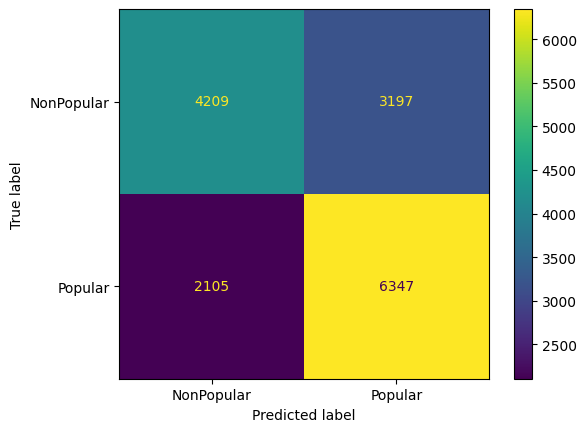

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = rfc.predict(x_test_scaled)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);


El modelo clasifica como populares la mayoría (~75%) de noticias que tienen más de 1300 shares.

Sin embargo, el modelo se confunde bastante con las noticias que tienen menos de 1300 shares, clasificando prácticamente la mitad como no populares, y la otra mitad como populares.

Parece ser que el modelo distingue bien noticias que tienen más de 3000 o 4000 shares de las que tienen menos de 1300. Sin embargo, falla mucho en noticias que tienen un número de shares cercano al umbral, lo cual provoca ese elevado número de fallos.

#### 5.2 - Explicabilidad del clasificador

Intentaremos determinar las características más importantes para la clasificación.



In [38]:
feature_names = x_train.columns

mdi_importances = pd.Series(
    rfc.feature_importances_, index=feature_names
).sort_values(ascending=True)

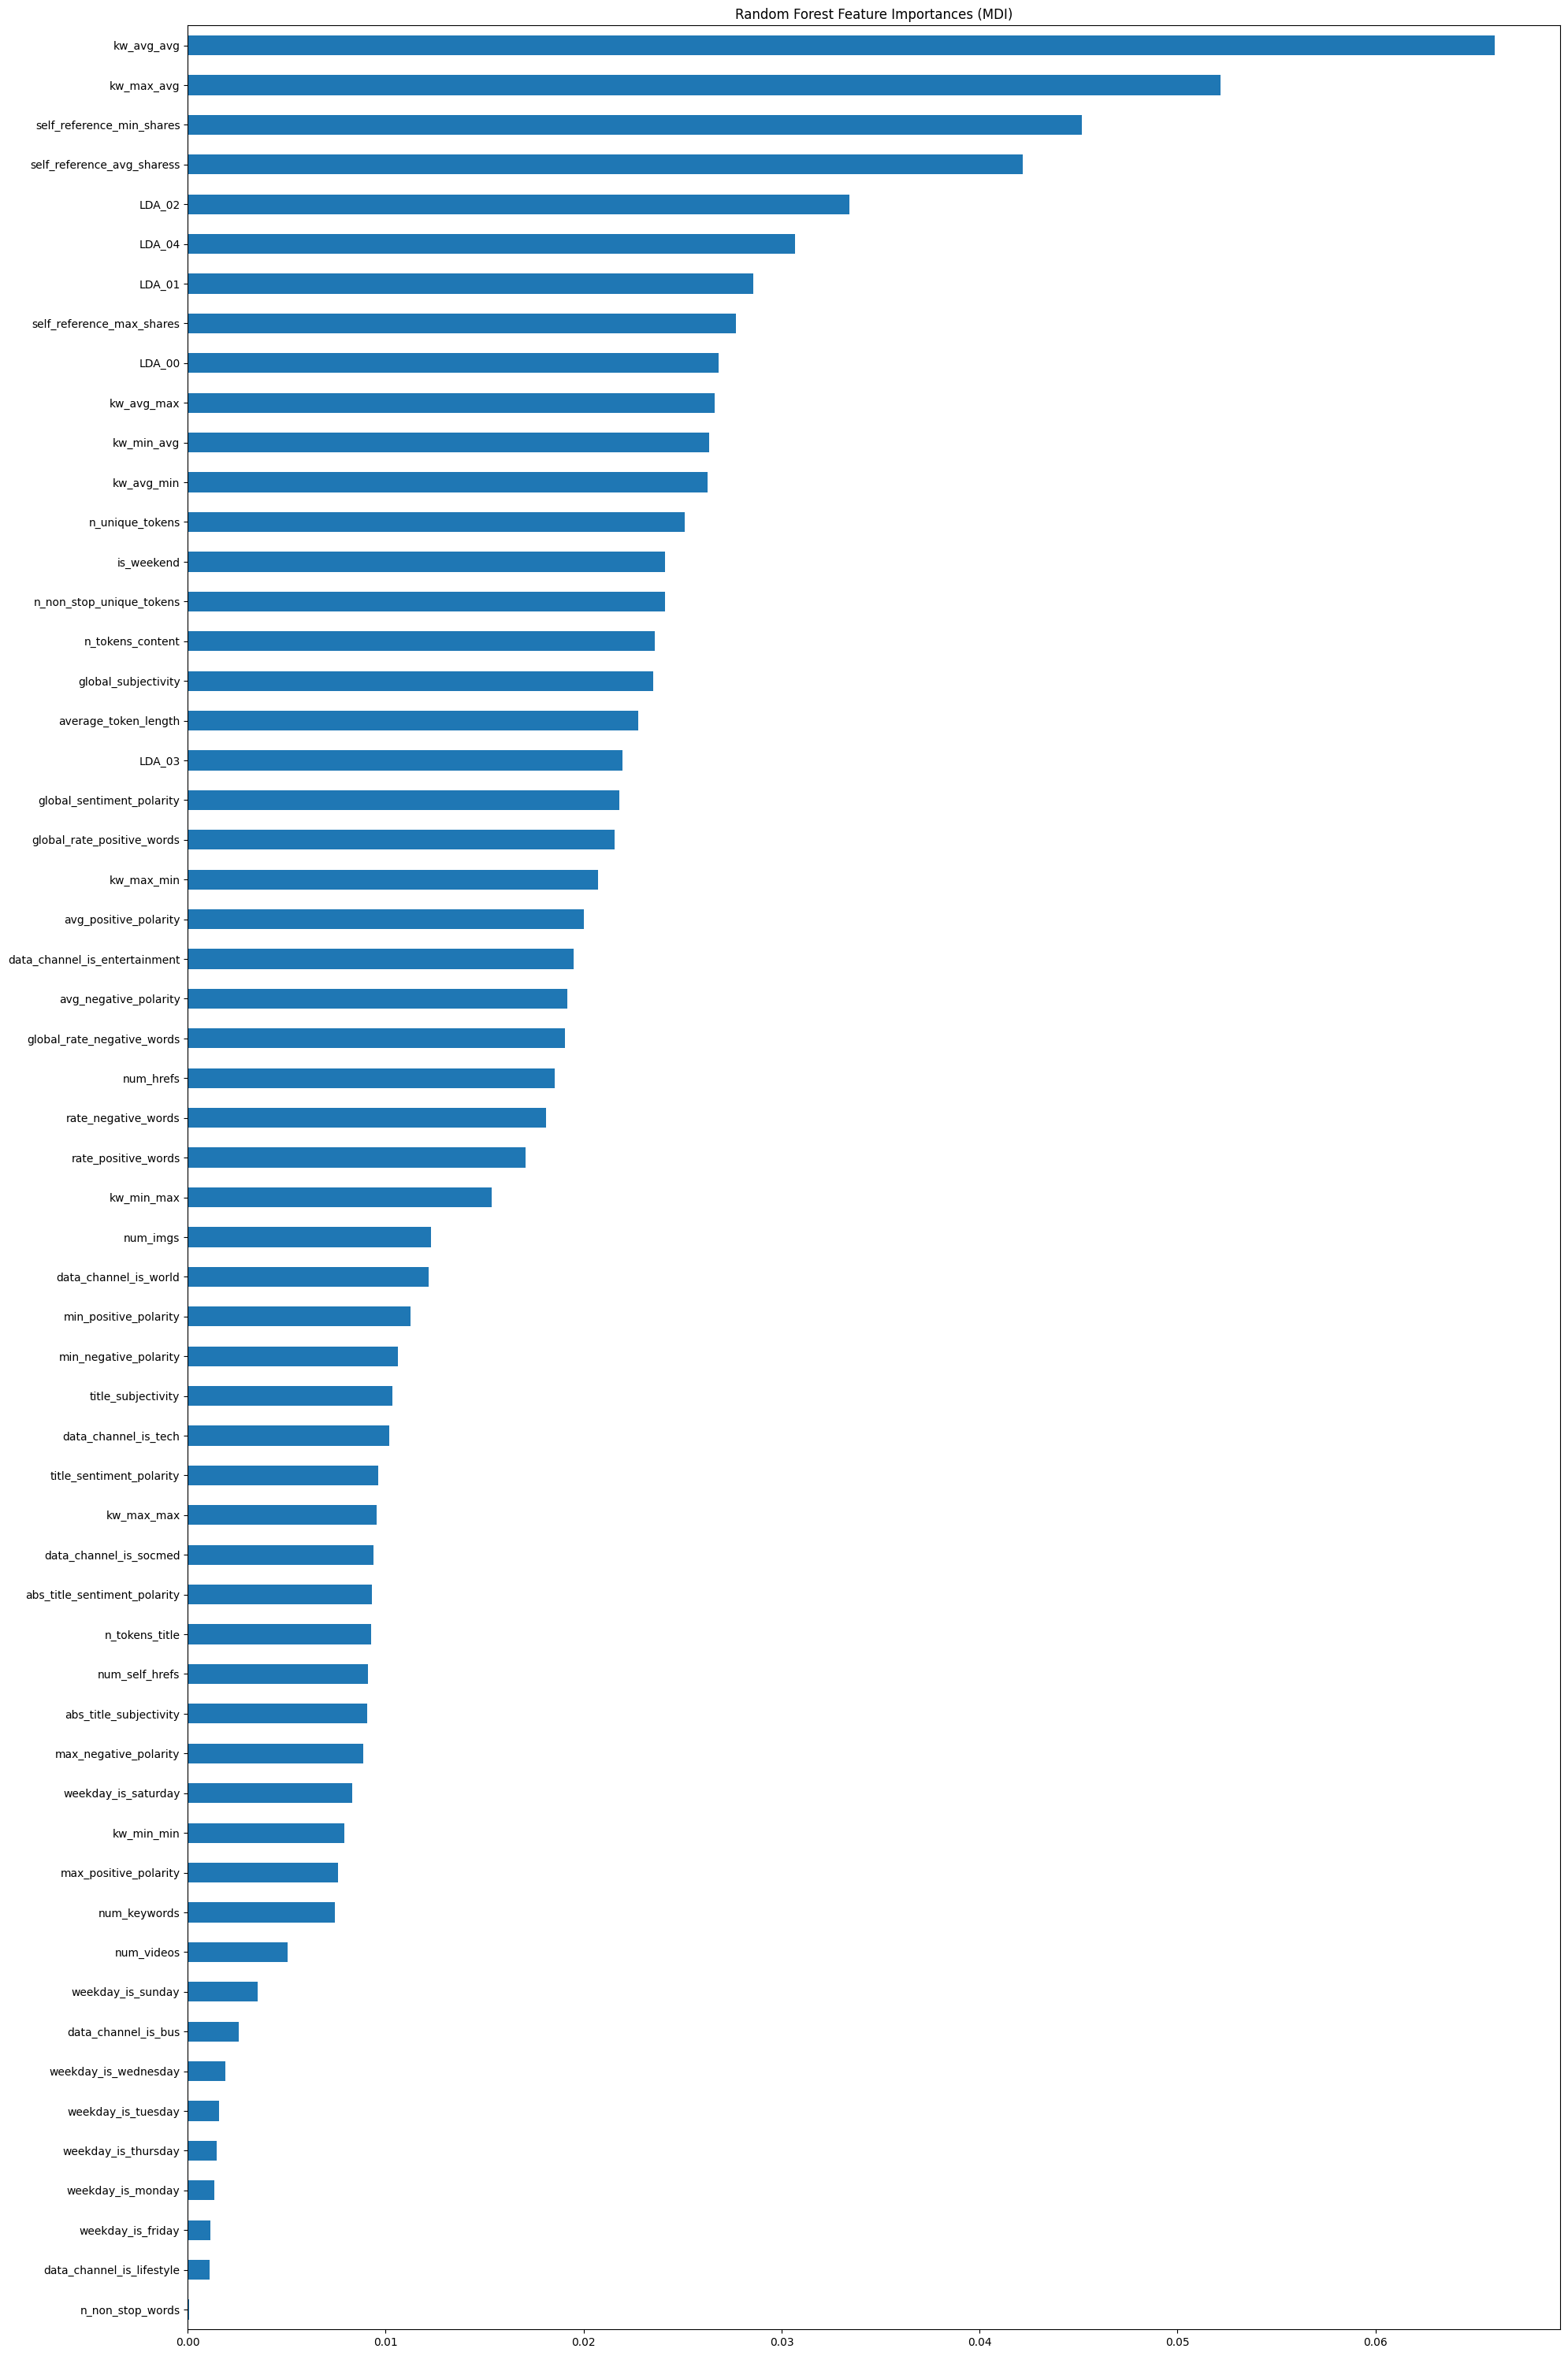

In [39]:
plt.figure(figsize=(20,30))
ax = mdi_importances.plot.barh()
ax.set_title("Random Forest Feature Importances (MDI)")
ax.figure.tight_layout()

Las características importantes en general están relacionadas con las palabras clave del artículo, enlaces a otros artículos y LDA.

#### 5.3 - Validación del regresor

Procedemos a validar el regresor. Para tener en cuenta solo el error del regresor, aplicaremos el clasificador, y entre los clasificados correctamente como los No Populares, intentaremos predecir el número de shares con el regresor.

In [40]:
y_pred = rfc.predict(x_test_scaled)
y_pred

test_set_aux = pd.DataFrame(test_set).drop(columns='popularity')
test_set_aux['popularity_pred'] = y_pred
test_set_aux['real_popularity'] = y_test

test_set_regr = test_set_aux[test_set_aux['popularity_pred'] == 'NonPopular']
test_set_regr = test_set_regr[test_set_regr['real_popularity'] == 'NonPopular']
test_set_regr

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popularity_pred,real_popularity
35841,8.0,166.0,0.703030,1.0,0.850000,1.0,1.0,0.0,2.0,4.391566,...,-0.327778,-0.500,-0.155556,0.900000,0.900000,0.400000,0.900000,872,NonPopular,NonPopular
29643,13.0,914.0,0.451153,1.0,0.566007,0.0,0.0,33.0,0.0,4.765864,...,-0.214863,-0.500,-0.071429,0.800000,0.050000,0.300000,0.050000,1200,NonPopular,NonPopular
19238,8.0,414.0,0.595062,1.0,0.738806,12.0,0.0,1.0,0.0,5.115942,...,-0.160714,-0.250,-0.071429,0.500000,0.500000,0.000000,0.500000,821,NonPopular,NonPopular
6858,12.0,2428.0,0.410448,1.0,0.625616,2.0,2.0,1.0,6.0,4.461285,...,-0.255505,-1.000,-0.050000,0.454545,0.136364,0.045455,0.136364,889,NonPopular,NonPopular
22654,12.0,608.0,0.420530,1.0,0.605678,7.0,1.0,1.0,1.0,4.692434,...,-0.302535,-0.500,-0.071429,1.000000,-1.000000,0.500000,1.000000,897,NonPopular,NonPopular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24453,9.0,0.0,0.000000,0.0,0.000000,0.0,0.0,6.0,0.0,0.000000,...,0.000000,0.000,0.000000,0.491667,-0.250000,0.008333,0.250000,1100,NonPopular,NonPopular
20947,9.0,382.0,0.622951,1.0,0.740000,8.0,2.0,1.0,0.0,5.123037,...,-0.124074,-0.400,-0.050000,0.500000,0.050000,0.000000,0.050000,1200,NonPopular,NonPopular
34935,12.0,523.0,0.525194,1.0,0.662824,16.0,1.0,0.0,0.0,5.089866,...,-0.162500,-0.250,-0.050000,0.000000,0.000000,0.500000,0.000000,83,NonPopular,NonPopular
442,11.0,144.0,0.639706,1.0,0.744681,8.0,4.0,1.0,0.0,4.847222,...,-0.116667,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,1100,NonPopular,NonPopular


In [41]:
x_test_regr = test_set_regr.drop(columns= ['popularity_pred', 'real_popularity', 'shares'])
y_test_regr = test_set_regr['shares']

In [42]:
x_test_regr_scaled = scaler_regr.transform(x_test_regr)

Ajustamos el regresor al dataset:

In [43]:
rfr = RandomForestRegressor(random_state=42, n_estimators = 200)

In [44]:
rfr.fit(x_train_r_scaled, y_train_r)

RandomForestRegressor(n_estimators=200, random_state=42)

Validamos el regresor usando como métrica el `MAE` (Mean Absolute Error) y `RMSE` (Root Mean Squared Error).

El `MAE` valora cómo son los errores en general del modelo mientras que `RMSE` muestra si el modelo comete grandes errores aunque sea en un número de ocasiones reducido.

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

modelos = [rfr]
modelos_nombres = ["RandomForest"]

scores_training = []
scores_test = []

for modelo in modelos:
  scores = []

  # Predicción del modelo en los datos de training
  y_pred = modelo.predict(x_train_r_scaled)

  # accuracy y f1-score en training
  scores.append(mean_absolute_error(y_train_r, y_pred))
  scores.append(np.sqrt(mean_squared_error(y_train_r, y_pred)))

  scores_training.append(scores)

  scores = []

  # Predicción del modelo en los datos de training
  y_pred = modelo.predict(x_test_regr_scaled)

  # accuracy y f1-score en test
  scores.append(mean_absolute_error(y_test_regr, y_pred))
  scores.append(np.sqrt(mean_squared_error(y_test_regr, y_pred)))

  scores_test.append(scores)

Mostramos los resultados tanto en entrenamiento como en test.

In [46]:
from tabulate import tabulate

tabla = []
aux = 0

for modelo,nombre in zip(modelos,modelos_nombres):
  fila = []
  fila.append(nombre)

  fila.append(scores_training[aux][0])
  fila.append(scores_training[aux][1])

  fila.append(scores_test[aux][0])
  fila.append(scores_test[aux][1])

  aux += 1

  tabla.append(fila)

print(tabulate(tabla,
               headers=['Modelo', 'MAE (training)', 'RMSE (training)',
                                  'MAE (test)', 'RMSE (test)'],
               tablefmt='fancy_grid',
               numalign='right'))

╒══════════════╤══════════════════╤═══════════════════╤══════════════╤═══════════════╕
│ Modelo       │   MAE (training) │   RMSE (training) │   MAE (test) │   RMSE (test) │
╞══════════════╪══════════════════╪═══════════════════╪══════════════╪═══════════════╡
│ RandomForest │          72.2275 │           89.1183 │      196.662 │       244.297 │
╘══════════════╧══════════════════╧═══════════════════╧══════════════╧═══════════════╛


**Los resultados parecen razonables, en relación con el rango de valores de los shares. El RMSE es ligeramente superior al MAE, lo cual significa que es probable que el modelo cometa errores elevados en algunas predicciones. También se observa menos overfitting que en clasificación.**

Veamos ahora en qué noticias se ha cometido un mayor error:

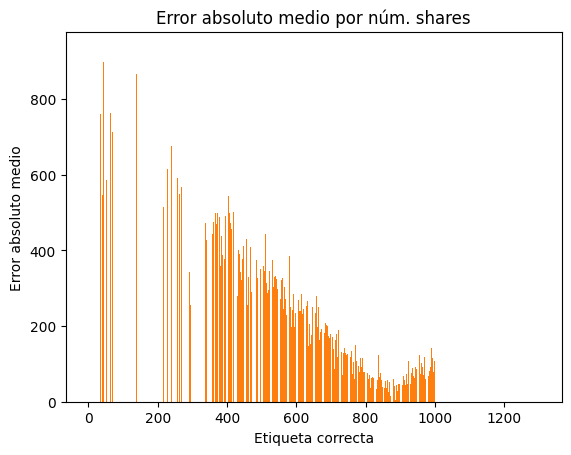

In [47]:
predicts = rfr.predict(x_test_regr_scaled)

errores = []

for i in range(0,1301):
  errores.append([])

# Añadimos el error cometido, al correspondiente de la entrada de ese año
for i in range(len(x_test_regr_scaled)):
  errores[round(y_test_regr.iloc[i])].append(abs(predicts[i]-y_test_regr.iloc[i]))

medias = []

# Calculamos la media
for arr in errores:
  if(len(arr) > 0):
    medias.append(np.mean(arr))
  else:
    medias.append(0)

# Mostramos
plt.bar(range(0,1301), medias, color='C1')
plt.title("Error absoluto medio por núm. shares")

ax = plt.gca
plt.xlabel('Etiqueta correcta')
plt.ylabel('Error absoluto medio')

plt.show()

El modelo predice de forma bastante correcta los shares de las noticias con entre 600 y 1000 shares, pero falla bastante en las noticias con muy pocos shares (menos de 200).

#### 5.4 - Explicabilidad del regresor

Intentaremos determinar las características más importantes para la regresión.

In [48]:
feature_names = x_train.columns

mdi_importances = pd.Series(
    rfr.feature_importances_, index=feature_names
).sort_values(ascending=True)

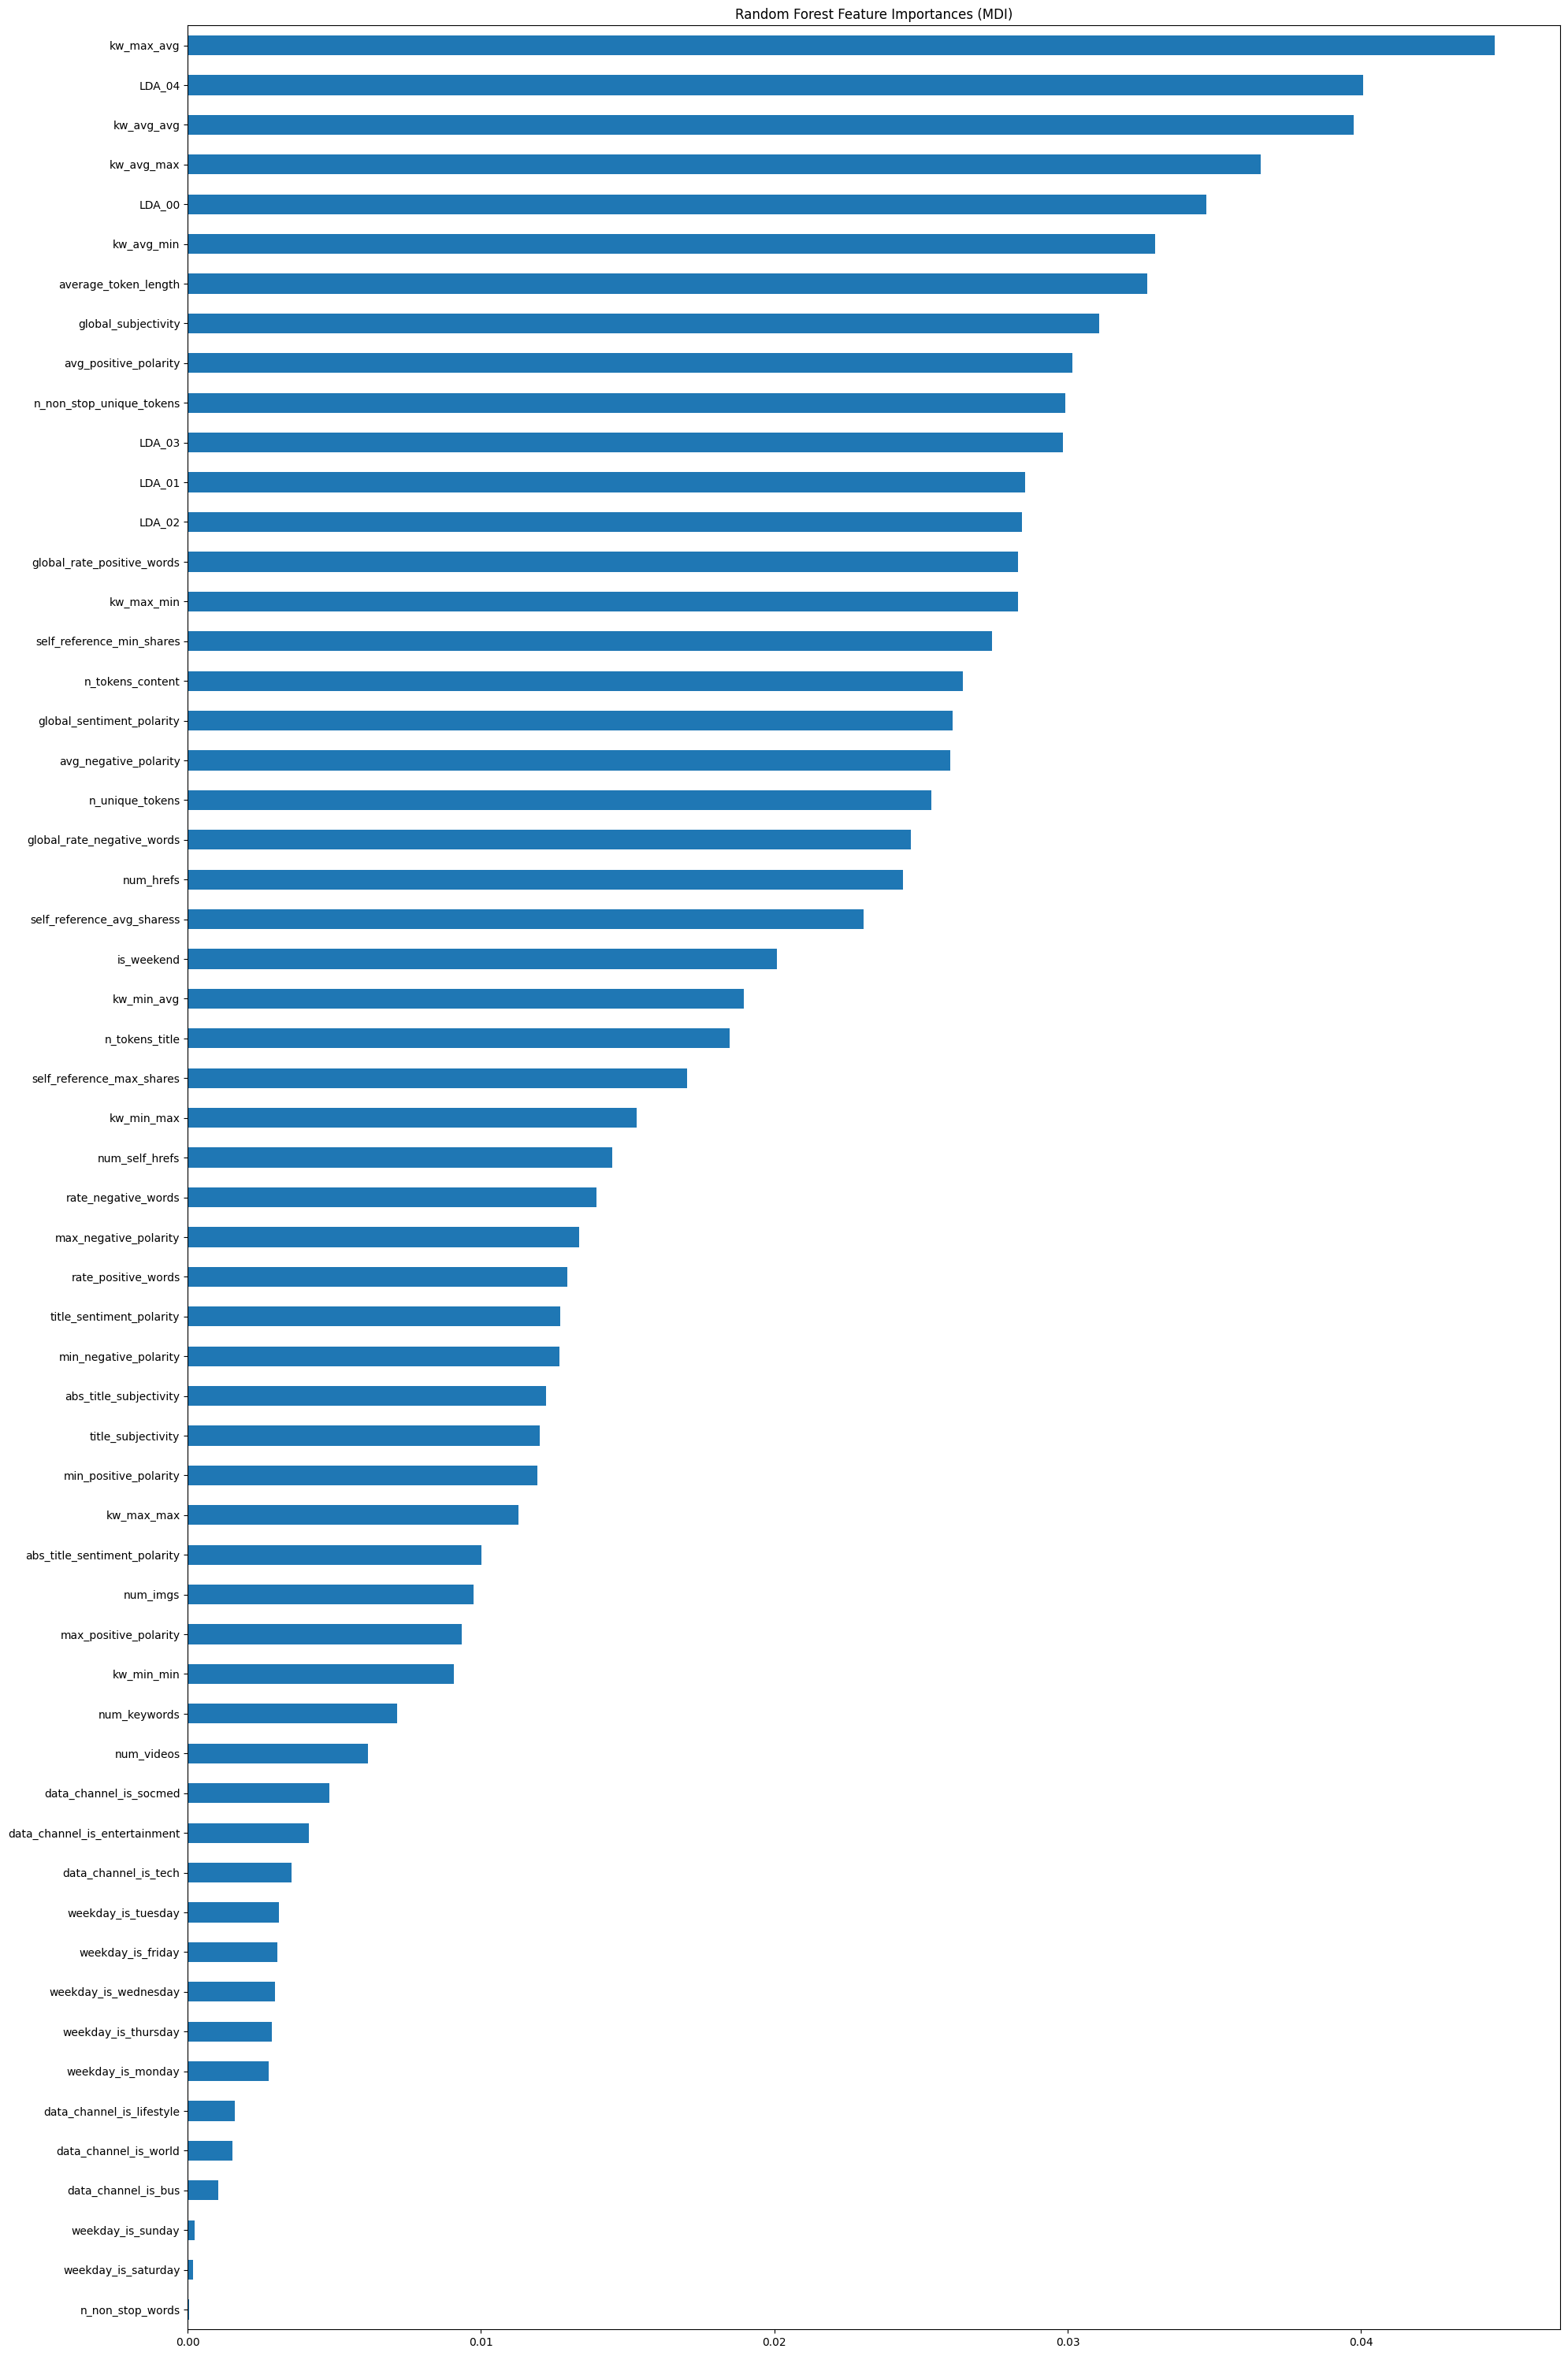

In [49]:
plt.figure(figsize=(20,30))
ax = mdi_importances.plot.barh()
ax.set_title("Random Forest Feature Importances (MDI)")
ax.figure.tight_layout()

Son prácticamente las mismas que en clasificación. Las características relacionadas con palabras claves y LDA siguen siendo importantes pero otras como `average token length` y `global subjectivity` han ganado importancia.

### 6 - Conclusiones

Como último apartado veíamos necesario destacar varios aspectos.

En primer lugar, queríamos remarcar las grandes dificultades que hemos encontrado al trabajar con este dataset. Prácticamente, todas las ideas que teníamos acababan obteniendo resultados de muy mala calidad.

Se ha intentado realizar un mayor preprocesado, se ha intentado realizar una división en un mayor número de clases,... el resultado siempre era el mismo y siempre encontrábamos que la solución más simple era la que obtenía los mejores resultados. De hecho, en el paper de referencia, se optaba por una solución incluso más sencilla que la nuestra.

Aunque se hayan considerado únicamente dos clases y se haya reducido el problema de regresión a uno bastante simple, los resultados distan mucho de ser perfectos; y nos muestra la complejidad de predecir el número de shares sabiendo únicamente aspectos puramente técnicos de la noticia.